## Challenge_Hypothesis Testing

In this challenge, you will consider the state of North Carolina data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. 

**The following is the variable descriptions**

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

**Based on this data, perform the following tasks**:


- Make a side-by-side boxplot of habit and weight. What does the plot highlight about the relationship between these two variables?

- Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

- Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

- Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

In [16]:
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
data = pd.read_csv("nc (1).csv")
data.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


**QUESTION 1 - BOX PLOT**

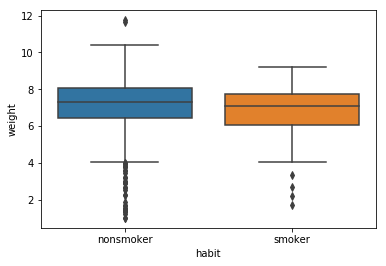

In [29]:
sns.boxplot(x='habit', y='weight', data=data)

The plot highlights the association between the two variables. From the plot we see that babies born to non smokers on average have higher weights than those born to smokers.(Median weight is lower for smokers) So habits seems to affect birth weight.

**QUESTION 2 - HYPOTHESIS TESTING (AVERAGE WEIGHT OF BABIES)**

H0 = The average weights of babies born to smoking and non-smoking mothers are not different.

HA = The average weights of babies born to smoking and non-smoking mothers are different

Null Hypothesis  :  μ1 = μ2    
Alternative Hypothesis:  μ1 ≠ μ2   

In [36]:
#descriptive statistics
desc = data.groupby('habit').agg({'weight': [np.mean, np.std, np.size]})
desc


weight                 
               mean       std   size
habit                               
nonsmoker  7.144273  1.518681  873.0
smoker     6.828730  1.386180  126.0

μ1−μ2= 0.3155

In [37]:
# conduct hypothesis test
hyptest = sm.stats.ztest(data.loc[data.habit=="smoker", "weight"].dropna(), 
                         data.loc[data.habit=="nonsmoker", "weight"].dropna(),
                         alternative='two-sided')

# calculate and print the  the Z-score, and p-value for the hypothesis test
testZ = hyptest[0]
p_value = hyptest[1]
print(f'Hypothesis test result = {hyptest}\n')
print(f'Test statistic: Z = {testZ}\n')
print(f'p-value = {p_value}\n')

# reject or do not reject null hypothesis
if(p_value) < 0.05:
    print('p-value < 0.05 ---> reject null hypothesis')
else:
    print('p-value > 0.05 ---> do not reject null hypothesis')

Hypothesis test result = (-2.2033962812961625, 0.02756683007480755)

Test statistic: Z = -2.2033962812961625

p-value = 0.02756683007480755

p-value < 0.05 ---> reject null hypothesis


Since the p-value (0.0276) is lower than the standard confidence level 0.05, we can reject the Null hypothesis that the average weights of babies born to smoking and non-smoking mothers are equal.

**Note:** alternative="two-sided" was used because we are testing for inequality in both sides.

**QUESTION 3 - HYPOTHESIS TESTING (WEIGHT GAINED)**

H0 = The average weight gained by younger mothers is not different than the average weight gained my mature mothers.

HA = The average weight gained by younger mothers is different than the average weight gained my mature mothers.

Null Hypothesis  :    μ1 = μ2   
Alternative Hypothesis:   μ1 ≠ μ2 

In [38]:
#descriptive statistics
desc = data.groupby('mature').agg({'gained': [np.mean, np.std, np.size]})
desc



gained                  
                  mean        std   size
mature                                  
mature mom   28.790698  13.482439  133.0
younger mom  30.560427  14.346910  867.0

μ1 - μ2 = 1.7697

In [55]:
# conduct hypothesis test
hyptest = sm.stats.ztest(data.loc[data.mature=="younger mom", "gained"].dropna(), 
                         data.loc[data.mature=="mature mom", "gained"].dropna(),
                         alternative='two-sided')

# calculate and print the Z-score, and p-value for the hypothesis test
testZ = hyptest[0]
p_value = hyptest[1]
print(f'Hypothesis test result = {hyptest}\n')
print(f'Test statistic: Z = {testZ}\n')
print(f'p-value = {p_value}\n')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('p-value < 0.05 ---> reject null hypothesis')
else:
    print('p-value > 0.05 ---> do not reject null hypothesis')

Hypothesis test result = (1.3150120052394427, 0.18850586777828726)

Test statistic: Z = 1.3150120052394427

p-value = 0.18850586777828726

p-value > 0.05 ---> do not reject null hypothesis


Since the p-value (0.188) is greater than the standard confidence level 0.05, we do not reject the Null hypothesis that the average weight gained by younger mothers is equal to the average weight gained by mature mothers. 

**Note:** alternative=two-sided was used because we are testing for inequality in both side.

**QUESTION 4 - CONFIDENCE INTERVAL**

In [43]:
desc = data.groupby('habit').agg({'weight' : [np.mean, np.std, np.size]})
desc

weight                 
               mean       std   size
habit                               
nonsmoker  7.144273  1.518681  873.0
smoker     6.828730  1.386180  126.0

In [48]:
#calculating the standard error of the mean for smoker, non smoker
se_nonsmoker = 1.518681 / np.sqrt(873)
se_smoker = 1.386180 / np.sqrt(126)
print(f"Standard error(non-smoker): {se_nonsmoker}\nStandard error(smoker):     {se_smoker}")

Standard error(non-smoker): 0.05139956431370965
Standard error(smoker):     0.12349072943805481


In [49]:
se_diff = np.sqrt(se_nonsmoker**2 + se_smoker**2)
se_diff

0.1337605153577917

In [50]:
#difference between the means
mean_diff = 7.144273 - 6.828730
print(f"Difference between the mean: {mean_diff}")

Difference between the mean: 0.3155429999999999


In [54]:
#lower and upper confidence interval bounds calculations
lower_cb = mean_diff - 1.96 * se_diff
upper_cb = mean_diff + 1.96 * se_diff
print(f"Lower bound: {lower_cb}\nUpper bound: {upper_cb}")

Lower bound: 0.05337238989872817
Upper bound: 0.5777136101012716


The answer above means that we are 95% confident that the difference between the average weight of the babies of smokers or non-smokers is between 0.0533 to 0.5777.